In [1]:
# It's always the libraries that get the exposure of the project intially.
import pandas as pd # A library helps us in many ways like handling missing values,merging and joining of datasets
import numpy as np # A library designed for high-level mathematical functions and scientific computation.
import matplotlib.pyplot as plt  # Matplotlib is an amazing visualization library in Python for 2D plots of arrays.
import seaborn as sns  #Seaborn is a library for making statistical graphics in Python.
%matplotlib inline       
import warnings #to ignore any warnings we get
warnings.filterwarnings("ignore")
#  Matplotlib inline With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook



In [2]:
# Import the dataset
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

# Exploratory data analysis

In [3]:
# EDA is to get the insights and patterns of the data
df.head(3)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949


In [4]:
movies_titles=pd.read_csv("Movie_Id_Titles.csv")

In [5]:
movies_titles.head(5)    # by default it gives initial 5 rows in the dataset we can have more just by entering the number

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
movies_titles.tail()  # by default it gives last 5 rows in the dataset we can have more just by entering the number

,item_id,title
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)
1681,1682,Scream of Stone (Schrei aus Stein) (1991)


# Merge df and movies_titles 

In [7]:
New_dataframe=pd.merge(df, movies_titles, on="item_id") #Merge is used to add both the datasets and is based on item_id
New_dataframe.head(10)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
5,274,50,5,878944679,Star Wars (1977)
6,227,50,4,879035347,Star Wars (1977)
7,99,50,5,885679998,Star Wars (1977)
8,305,50,5,886321799,Star Wars (1977)
9,108,50,4,879879739,Star Wars (1977)


In [8]:
sns.set_style('white') # For the background to be white

In [10]:
New_dataframe.groupby('title')['rating'].mean().sort_values(ascending=False).head()


title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [12]:
New_dataframe.groupby("title")["rating"].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [18]:
ratings=pd.DataFrame(New_dataframe.groupby('title')['rating'].mean())
ratings.head(2)

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000


In [21]:
ratings["number of ratings"]=pd.DataFrame(New_dataframe.groupby("title")["rating"].count())
ratings.head(4)

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125


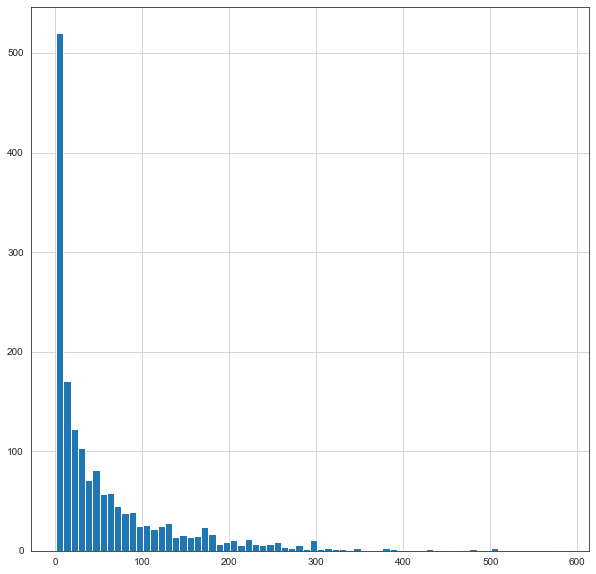

In [25]:
# Let's draw a few histograms
plt.figure(figsize=(10,10))
ratings['number of ratings'].hist(bins=70)

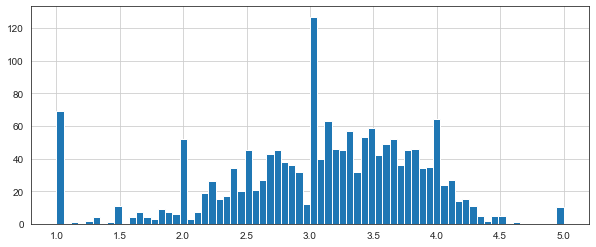

In [27]:
plt.figure(figsize=(10,4))
ratings["rating"].hist(bins=70)

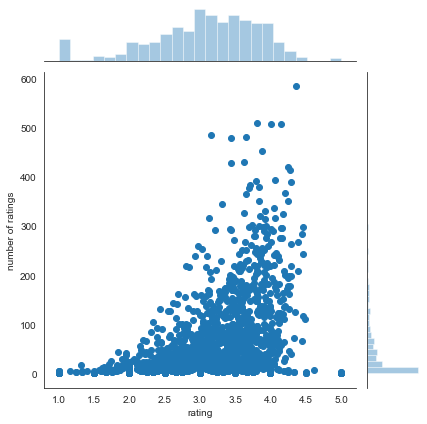

In [28]:
sns.jointplot(x="rating", y="number of ratings", data=ratings)  # It gives scatter plot as well as histogram

# Recommending Similar Movies
Now let's create a matrix that has the user ids on one access and the movie title on another axis. 
Each cell will then consist of the rating the user gave to that movie.
Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [34]:
# It's like we are creating a bag of words or matrix
movie_matrix=New_dataframe.pivot_table(index="user_id", columns="title", values="rating")
# Here user_id would be on the first column, title means all the movie names in a row and rating leaves a value for each movie
# to see all the columns
pd.options.display.max_columns=None
movie_matrix.head()


title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
0                              NaN           NaN                    NaN   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
0                        NaN         NaN                          NaN   
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
0                                        NaN                           NaN   
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   

title    8 1/2 (1963)  8 Heads in a Duffel Bag (1997)  8 Seconds (1994)  \
user_id                                                                   
0                 NaN                             NaN               NaN   
1                 NaN                             NaN               NaN   
2                 NaN                             NaN               NaN   
3                 NaN                             NaN               NaN   
4                 NaN                             NaN               NaN   

title    A Chef in Love (1996)  Above the Rim (1994)  Absolute Power (1997)  \
user_id                                                                       
0                          NaN                   NaN                    NaN   
1                          NaN                   NaN                    NaN   
2                          NaN                   NaN                    3.0   
3                          NaN                   NaN                    NaN   
4                          NaN                   NaN                    NaN   

title    Abyss, The (1989)  Ace Ventura: Pet Detective (1994)  \
user_id                                                         
0                      NaN                                NaN   
1                      3.0                                3.0   
2                      NaN                                NaN   
3                      NaN                                NaN   
4                      NaN                                NaN   

title    Ace Ventura: When Nature Calls (1995)  Across the Sea of Time (1995)  \
user_id                                                                         
0                                          NaN                            NaN   
1                                          NaN                            NaN   
2       

In [35]:
# now let's sort the values
ratings.sort_values("number of ratings", ascending=False).head(5)

,rating,number of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [36]:
ratings.head()

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [38]:
# Now let's grab the user ratings for those two movies:
Return_user_ratings=movie_matrix["Return of the Jedi (1983)"]
Fargo_user_ratings=movie_matrix["Fargo (1996)"]
Return_user_ratings.head(5)





user_id
0    NaN
1    5.0
2    NaN
3    4.0
4    NaN
Name: Return of the Jedi (1983), dtype: float64

In [40]:
similar_to_Return_of_the_Jedi=movie_matrix.corrwith(Return_user_ratings)
similar_to_Fargo=movie_matrix.corrwith(Fargo_user_ratings)

In [42]:
 # Let's clean this by removing NaN values and using a DataFrame instead of a series:
similar_to_RotJ=pd.DataFrame(similar_to_Return_of_the_Jedi, columns=["correlation"])

In [44]:
similar_to_RotJ.dropna(inplace=True)
similar_to_RotJ.head(5)

,correlation
title,
'Til There Was You (1997),1.000000
1-900 (1994),-0.828079
101 Dalmatians (1996),0.165659
12 Angry Men (1957),-0.026169
187 (1997),0.064155


In [45]:
similar_to_RotJ.sort_values("correlation", ascending=False).head(5)

,correlation
title,
Mrs. Dalloway (1997),1.0
Stripes (1981),1.0
"Quiet Room, The (1996)",1.0
"Wedding Gift, The (1994)",1.0
Return of the Jedi (1983),1.0


In [46]:
#Let's fix this by filtering out movies that have less than 100 reviews
#(this value was chosen based off the histogram from earlier).
similar_to_RotJ=similar_to_RotJ.join(ratings["number of ratings"])
similar_to_RotJ.head(10)


,correlation,number of ratings
title,,
'Til There Was You (1997),1.000000,9
1-900 (1994),-0.828079,5
101 Dalmatians (1996),0.165659,109
12 Angry Men (1957),-0.026169,125
187 (1997),0.064155,41
2 Days in the Valley (1996),0.047452,93
"20,000 Leagues Under the Sea (1954)",0.104229,72
2001: A Space Odyssey (1968),0.085975,259
"39 Steps, The (1935)",0.218723,59


In [49]:
# Let's consider only over 100 number of ratings after sorting
similar_to_RotJ[similar_to_RotJ["number of ratings"]>100].sort_values("correlation", ascending=False).head(10)

,correlation,number of ratings
title,,
Return of the Jedi (1983),1.000000,507
"Empire Strikes Back, The (1980)",0.721229,368
Star Wars (1977),0.672556,584
Raiders of the Lost Ark (1981),0.467391,420
Indiana Jones and the Last Crusade (1989),0.422294,331
Sneakers (1992),0.412559,150
Back to the Future (1985),0.411901,350
"Frighteners, The (1996)",0.391322,115
True Lies (1994),0.364536,208


In [50]:
# Now the same for the movie Fargo
similar_to_Fargo.head(3)

title
'Til There Was You (1997)    0.100000
1-900 (1994)                 0.866025
101 Dalmatians (1996)       -0.245368
dtype: float64

In [52]:
similar_to_Fargo=pd.DataFrame(similar_to_Fargo, columns=["correlation"])
similar_to_Fargo.dropna(inplace=True)
similar_to_Fargo.head()

,correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


In [56]:
similar_to_Fargo.sort_values("correlation", ascending=False).head(10)

,correlation,number of ratings
title,,
"Smile Like Yours, A (1997)",1.0,25
Open Season (1996),1.0,2
"Journey of August King, The (1995)",1.0,4
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0,3
"Wedding Gift, The (1994)",1.0,3
Nowhere (1997),1.0,3
Captives (1994),1.0,3
City of Industry (1997),1.0,6
"Convent, The (Convento, O) (1995)",1.0,2


In [58]:
similar_to_Fargo[similar_to_Fargo["number of ratings"]>100].sort_values("correlation", ascending=False).head(100)

,correlation,number of ratings
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
True Romance (1993),0.345781,104
Raging Bull (1980),0.344163,116
"People vs. Larry Flynt, The (1996)",0.341784,215
"Magnificent Seven, The (1954)",0.338462,121
